<a href="https://colab.research.google.com/github/marcelogarret/reconpad/blob/main/aula8a_titanic_garret_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [2]:
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0

In [3]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

# train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

# train['Name_Miss'] = train['Name'].str.contains("Miss").astype(int)
# train['Name_Mrs'] = train['Name'].str.contains("Mrs").astype(int)

# train['Name_Master'] = train['Name'].str.contains("Master").astype(int)
# train['Name_Col'] = train['Name'].str.contains("Col").astype(int)
# train['Name_Major'] = train['Name'].str.contains("Major").astype(int)
# train['Name_Mr'] = train['Name'].str.contains("Mr").astype(int)

train['Sex_Bin'] = train['Sex'].map(transformar_sexo)

train = train.drop(['Embarked', 'Cabin', 'Name', 'Sex', 'Ticket', 'PassengerId'], axis=1)

In [7]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_S',
       'Embarked_C', 'Embarked_Q', 'Sex_Bin'],
      dtype='object')

In [8]:
train.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_S      int64
Embarked_C      int64
Embarked_Q      int64
Sex_Bin         int64
dtype: object

In [9]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
test['Embarked_Q'] = (test['Embarked'] == 'Q').astype(int)

# test['Cabine_nula'] = test['Cabin'].isnull().astype(int)

# test['Name_Miss'] = test['Name'].str.contains("Miss").astype(int)
# test['Name_Mrs'] = test['Name'].str.contains("Mrs").astype(int)

# test['Name_Master'] = test['Name'].str.contains("Master").astype(int)
# test['Name_Col'] = test['Name'].str.contains("Col").astype(int)
# test['Name_Major'] = test['Name'].str.contains("Major").astype(int)
# test['Name_Mr'] = test['Name'].str.contains("Mr").astype(int)

test['Sex_Bin'] = test['Sex'].map(transformar_sexo)

test = test.drop(['Embarked', 'Cabin', 'Name', 'Sex', 'Ticket', 'PassengerId'], axis=1)

In [10]:
test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C',
       'Embarked_Q', 'Sex_Bin'],
      dtype='object')

In [11]:
X = train.drop('Survived', axis=1)
y = train['Survived']
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C',
       'Embarked_Q', 'Sex_Bin'],
      dtype='object')

In [12]:
for column in X.columns:
  print(f"{column:>12} {len(set(X[column])):4} {X[column].dtype}")

      Pclass    3 int64
         Age  265 float64
       SibSp    7 int64
       Parch    7 int64
        Fare  248 float64
  Embarked_S    2 int64
  Embarked_C    2 int64
  Embarked_Q    2 int64
     Sex_Bin    2 int64


In [13]:
for column in X.columns:
  print(f"{column:>12} {sum(X[column].isnull())}")

      Pclass 0
         Age 177
       SibSp 0
       Parch 0
        Fare 0
  Embarked_S 0
  Embarked_C 0
  Embarked_Q 0
     Sex_Bin 0


In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
XLimpo = imputer.fit_transform(X)
XLimpo

array([[ 3., 22.,  1., ...,  0.,  0.,  0.],
       [ 1., 38.,  1., ...,  1.,  0.,  1.],
       [ 3., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 28.,  1., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  1.,  0.,  0.],
       [ 3., 32.,  0., ...,  0.,  1.,  0.]])

In [15]:
for column in test.columns:
  print(f"{column:>12} {sum(test[column].isnull())}")

      Pclass 0
         Age 86
       SibSp 0
       Parch 0
        Fare 1
  Embarked_S 0
  Embarked_C 0
  Embarked_Q 0
     Sex_Bin 0


In [16]:
testLimpo = imputer.fit_transform(test)
testLimpo

array([[ 3. , 34.5,  0. , ...,  0. ,  1. ,  0. ],
       [ 3. , 47. ,  1. , ...,  0. ,  0. ,  1. ],
       [ 2. , 62. ,  0. , ...,  0. ,  1. ,  0. ],
       ...,
       [ 3. , 38.5,  0. , ...,  0. ,  0. ,  0. ],
       [ 3. , 27. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 3. , 27. ,  1. , ...,  1. ,  0. ,  0. ]])

In [17]:
import numpy as np
Xtratado = np.array(XLimpo)
Xtratado.shape

(891, 9)

In [18]:
testtratado = np.array(testLimpo)
testtratado.shape

(418, 9)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtratado_scaler = scaler.fit_transform(Xtratado)
Xtratado_scaler

array([[ 0.82737724, -0.56573646,  0.43279337, ..., -0.48204268,
        -0.30756234, -0.73769513],
       [-1.56610693,  0.66386103,  0.43279337, ...,  2.0745051 ,
        -0.30756234,  1.35557354],
       [ 0.82737724, -0.25833709, -0.4745452 , ..., -0.48204268,
        -0.30756234,  1.35557354],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ..., -0.48204268,
        -0.30756234,  1.35557354],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  2.0745051 ,
        -0.30756234, -0.73769513],
       [ 0.82737724,  0.20276197, -0.4745452 , ..., -0.48204268,
         3.25137334, -0.73769513]])

In [20]:
testtratado_scaler = scaler.fit_transform(testtratado)
testtratado_scaler

array([[ 0.87348191,  0.38623105, -0.49947002, ..., -0.56814154,
         2.84375747, -0.75592895],
       [ 0.87348191,  1.37137004,  0.61699237, ..., -0.56814154,
        -0.35164743,  1.32287566],
       [-0.31581919,  2.55353683, -0.49947002, ..., -0.56814154,
         2.84375747, -0.75592895],
       ...,
       [ 0.87348191,  0.70147553, -0.49947002, ..., -0.56814154,
        -0.35164743, -0.75592895],
       [ 0.87348191, -0.20485235, -0.49947002, ..., -0.56814154,
        -0.35164743, -0.75592895],
       [ 0.87348191, -0.20485235,  0.61699237, ...,  1.76012477,
        -0.35164743, -0.75592895]])

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

modelo1 = DecisionTreeClassifier()
modelo2 = RandomForestClassifier()
modelo3 = LogisticRegression()

In [22]:
from sklearn.metrics import accuracy_score

modelo1.fit(Xtratado_scaler, y)
ypred = modelo1.predict(Xtratado_scaler)
accuracy_score(y, ypred)

0.9797979797979798

In [23]:
modelo2.fit(Xtratado_scaler, y)
ypred = modelo2.predict(Xtratado_scaler)
accuracy_score(y, ypred)

0.9797979797979798

In [24]:
modelo3.fit(Xtratado_scaler, y)
ypred = modelo3.predict(Xtratado_scaler)
accuracy_score(y, ypred)

0.8002244668911336

In [25]:
import numpy as np
from sklearn.model_selection import cross_validate

scores = cross_validate(modelo1, Xtratado_scaler, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.00287294, 0.00677276, 0.00524187, 0.00283837, 0.00250268]),
  'score_time': array([0.00098991, 0.00183034, 0.00114083, 0.00098276, 0.0009141 ]),
  'test_score': array([0.74860335, 0.7752809 , 0.80898876, 0.74157303, 0.79775281])},
 0.7744397715146569)

In [26]:
scores = cross_validate(modelo2, Xtratado_scaler, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.2394321 , 0.22311354, 0.22602248, 0.20986629, 0.22564435]),
  'score_time': array([0.00950098, 0.00936341, 0.01064157, 0.01085782, 0.00937223]),
  'test_score': array([0.77094972, 0.80898876, 0.84831461, 0.78089888, 0.8258427 ])},
 0.8069989328981231)

In [27]:
scores = cross_validate(modelo3, Xtratado_scaler, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.00867748, 0.00671506, 0.00483727, 0.0048821 , 0.00481653]),
  'score_time': array([0.00184417, 0.00114179, 0.00108075, 0.00107098, 0.00103331]),
  'test_score': array([0.77094972, 0.78651685, 0.78089888, 0.76966292, 0.82022472])},
 0.7856506182913816)

In [28]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'tol': [1e-3, 1e-4],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [1000, 2000],
    'fit_intercept': [True, False]
}

modeloGS1 = GridSearchCV(modelo3, param_grid=parametros, verbose=1)
scores = cross_validate(modeloGS1, Xtratado_scaler, y)
scores, np.mean(scores['test_score'])

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits


({'fit_time': array([1.84871554, 1.77759242, 2.36448359, 2.33224583, 1.71921349]),
  'score_time': array([0.00109506, 0.00107241, 0.00139523, 0.00108981, 0.00106335]),
  'test_score': array([0.77094972, 0.78651685, 0.78089888, 0.76966292, 0.82022472])},
 0.7856506182913816)

In [29]:
modeloGS1.fit(Xtratado_scaler, y)
modeloGS1.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'fit_intercept': True, 'max_iter': 1000, 'solver': 'lbfgs', 'tol': 0.001}

In [30]:
submission = pd.read_csv('gender_submission.csv')
ypred = modeloGS1.predict(testtratado_scaler)
submission['Survived'] = ypred
submission.to_csv('tree_submission_logreg.csv', index=False)

In [31]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'max_depth': [None, 5, 10, 15],
    'splitter': ['best', 'random'],
    # 'max_features': [None, 'auto', 'sqrt', 'log2']
}

modeloGS2 = GridSearchCV(modelo1, param_grid=parametros, verbose=1)
scores = cross_validate(modeloGS2, Xtratado_scaler, y)
scores, np.mean(scores['test_score'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


({'fit_time': array([0.12897539, 0.1124146 , 0.11022663, 0.12087798, 0.11808085]),
  'score_time': array([0.00077176, 0.00075531, 0.00080895, 0.00095153, 0.00078893]),
  'test_score': array([0.75977654, 0.82022472, 0.81460674, 0.79775281, 0.85393258])},
 0.8092586780490867)

In [32]:
modeloGS2.fit(Xtratado_scaler, y)
modeloGS2.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'max_depth': 5, 'splitter': 'best'}

In [33]:
submission = pd.read_csv('gender_submission.csv')
ypred = modeloGS2.predict(testtratado_scaler)
submission['Survived'] = ypred
submission.to_csv('tree_submission_dectree.csv', index=False)

In [34]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'max_depth': [None, 5, 10, 15],
    'n_estimators': [300, 500, 1000, 1500, 2000],
    # 'max_features': [None, 'auto', 'sqrt', 'log2']
}

modeloGS3 = GridSearchCV(modelo2, param_grid=parametros, verbose=1)
scores = cross_validate(modeloGS3, Xtratado_scaler, y)
scores, np.mean(scores['test_score'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


({'fit_time': array([232.02868009, 224.29119349, 226.84365606, 221.24740434,
         223.34457278]),
  'score_time': array([0.03494287, 0.07826877, 0.10516715, 0.03893971, 0.16437674]),
  'test_score': array([0.79329609, 0.80898876, 0.84831461, 0.80898876, 0.85955056])},
 0.8238277572029377)

In [35]:
modeloGS3.fit(Xtratado_scaler, y)
modeloGS3.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_depth': 10, 'n_estimators': 1000}

In [36]:
submission = pd.read_csv('gender_submission.csv')
ypred = modeloGS3.predict(testtratado_scaler)
submission['Survived'] = ypred
submission.to_csv('tree_submission_randfor.csv', index=False)

In [37]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'max_depth': [10, 20],
    'n_estimators': [500, 1000, 2000],
    'max_features': [None, 'sqrt', 'log2']
}

modeloGS4 = GridSearchCV(modelo2, param_grid=parametros, verbose=1)
scores = cross_validate(modeloGS4, Xtratado_scaler, y)
scores, np.mean(scores['test_score'])

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits


({'fit_time': array([240.50597477, 235.86581731, 236.41482353, 238.82759404,
         239.29791999]),
  'score_time': array([0.05706334, 0.03792167, 0.10336995, 0.15544343, 0.16109776]),
  'test_score': array([0.81005587, 0.82022472, 0.87078652, 0.78651685, 0.85393258])},
 0.8283033080158182)

In [38]:
modeloGS4.fit(Xtratado_scaler, y)
modeloGS4.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 2000}

In [39]:
submission = pd.read_csv('gender_submission.csv')
ypred = modeloGS4.predict(testtratado_scaler)
submission['Survived'] = ypred
submission.to_csv('tree_submission_randfor (5).csv', index=False)

In [42]:
score = 0.79904
(score-0.65)*125

18.629999999999995

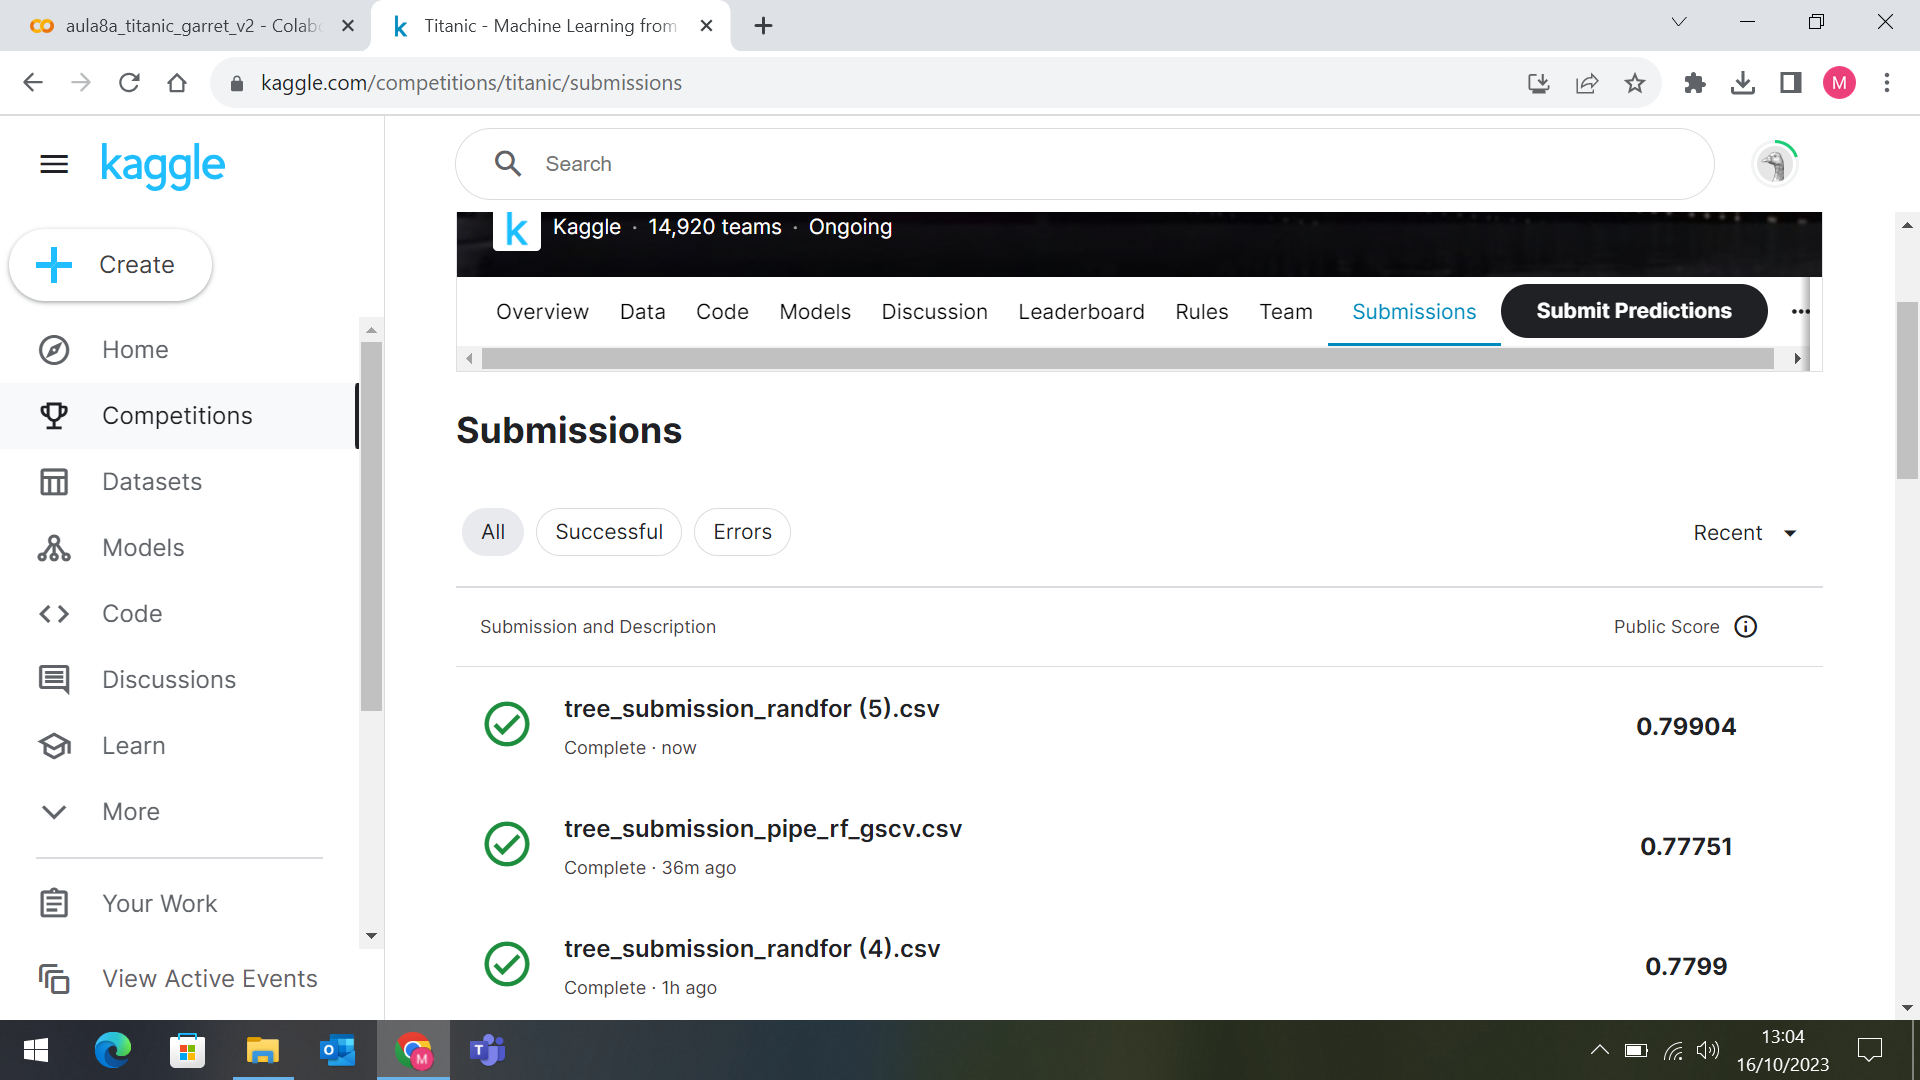